In [3]:
#meta 12/29/2020 Kaggle Cassava Dataprep
#fast.ai 2020 study group Kaggle Competition
#src https://www.kaggle.com/c/cassava-leaf-disease-classification
#prev competition src https://www.kaggle.com/c/cassava-disease
#references https://arxiv.org/pdf/1908.02900.pdf

#input: kaggle files - images, csv with 5 cats
#output: n/a
#pwd: /kaggle/working

#history
#here 1/2/2020 EXAMINE DATA

#some references:
#tutorial 

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#modeling
from fastai.vision.all import *


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
i=0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if not 'jpg' in filename:
            print(os.path.join(dirname, filename))
        else:
            
            if i<5:
                print (os.path.join(dirname, filename))
                i += 1

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassava-leaf-disease-classification/sample_submission.csv
/kaggle/input/cassava-leaf-disease-classification/label_num_to_disease_map.json
/kaggle/input/cassava-leaf-disease-classification/train.csv
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train14-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train13-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train04-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train01-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train08-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train00-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train10-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train02-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train15-1327.tf

Global objects

In [49]:
#--constants and variables
SEED = 24

#--functions
#define label lookup 
def lookup_label(image_id): return int(df_train[df_train['image_id']== image_id]['label'])

#test function
#lookup_label('100042118.jpg')

# Cassava Disease Classification
##### Objective: Classify pictures of cassava leaves into 1 of 4 disease categories or healthy.

As the second-largest provider of carbohydrates in Africa, cassava is a key food security crop grown by smallholder farmers because it can withstand harsh conditions. At least 80% of household farms in Sub-Saharan Africa grow this starchy root, but viral diseases are major sources of poor yields. With the help of data science, it may be possible to identify common diseases so they can be treated.

Existing methods of disease detection require farmers to solicit the help of government-funded agricultural experts to visually inspect and diagnose the plants. This suffers from being labor-intensive, low-supply and costly. As an added challenge, effective solutions for farmers must perform well under significant constraints, since African farmers may only have access to mobile-quality cameras with low-bandwidth.

In this competition, we introduce a dataset of 21,367 labeled images collected during a regular survey in Uganda. Most images were crowdsourced from farmers taking photos of their gardens, and annotated by experts at the National Crops Resources Research Institute (NaCRRI) in collaboration with the AI lab at Makerere University, Kampala. This is in a format that most realistically represents what farmers would need to diagnose in real life.

Your task is to classify each cassava image into four disease categories or a fifth category indicating a healthy leaf. With your help, farmers may be able to quickly identify diseased plants, potentially saving their crops before they inflict irreparable damage.


## 0. Data

- Input: a dataset of 21,367 labeled images collected during a regular survey in Uganda.  
- Output: 5 categories, including healthy + 4 fine-grained cassava leaf disease categories

In [7]:
path_full = Path('../input/cassava-leaf-disease-classification')
#path.ls()

## 0.0 Create Subset
Created a temporary smaller subset of ~100 Images in my custom directory `zz`

In [8]:
#!pwd
#!mkdir zz

#!cd /kaggle/input/cassava-leaf-disease-classification/train_images
#!cp 1761091007.jpg  2515485322.jpg  3296169925.jpg  407801447.jpg   996927503.jpg 1761544079.jpg  2515648929.jpg  3296239193.jpg  4078601864.jpg  996947690.jpg 1761563739.jpg  2515947948.jpg  3296434764.jpg  4079242692.jpg  996957803.jpg 1761634229.jpg  2516076631.jpg  3296532916.jpg  4079437688.jpg  997161074.jpg 1761652043.jpg  2516082759.jpg  3296590724.jpg  40795473.jpg    997179968.jpg 1761696568.jpg  2516099863.jpg  3296986189.jpg  4079941284.jpg  997289539.jpg 1761795923.jpg  2516136783.jpg  3297009135.jpg  4080358205.jpg  997485103.jpg 1761872222.jpg  251635361.jpg   3297278191.jpg  4080368773.jpg  997651546.jpg 1761893158.jpg  2516383896.jpg  3297922486.jpg  4080443505.jpg  997857988.jpg 1762040629.jpg  2516584960.jpg  3297949635.jpg  408051106.jpg   997910101.jpg 1762100381.jpg  2516805400.jpg  3298030379.jpg  4080548789.jpg  997973414.jpg 1762956560.jpg  2516864757.jpg  3298093070.jpg  4080639262.jpg  998910982.jpg 1762982108.jpg  25169920.jpg    3298309036.jpg  4080805940.jpg  999068805.jpg 1763032962.jpg  251711364.jpg   3298543306.jpg  408081310.jpg   999329392.jpg 1763195879.jpg 2517495253.jpg  3298994120.jpg  4080945037.jpg  999474432.jpg 17632796.jpg    2517886077.jpg  3299026258.jpg  4080972605.jpg  999616605.jpg 1763396057.jpg  2517952963.jpg  3299267468.jpg  4081070840.jpg  999998473.jpg /kaggle/working/zz

In [ ]:
#src Daniel
#if not os.path.exists('/kaggle/working/zz/'):
#        os.makedirs('zz/')

#!cd /kaggle/input/cassava-leaf-disease-classification/train_images
#!cp '../input/resnet185c106cdepth/resnet18-5c106cde.pth' '/root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth'

In [13]:
path = Path('/kaggle/working/zz')
path.ls()


(#85) [Path('/kaggle/working/zz/251711364.jpg'),Path('/kaggle/working/zz/4080639262.jpg'),Path('/kaggle/working/zz/4080945037.jpg'),Path('/kaggle/working/zz/999998473.jpg'),Path('/kaggle/working/zz/2516584960.jpg'),Path('/kaggle/working/zz/1761696568.jpg'),Path('/kaggle/working/zz/17632796.jpg'),Path('/kaggle/working/zz/996957803.jpg'),Path('/kaggle/working/zz/3298543306.jpg'),Path('/kaggle/working/zz/4080972605.jpg')...]

### 0.1 Images  
85 temp train images

In [17]:
#load temp train images
train_img = get_image_files(path)

print("Number of files: ", len(train_img))

Number of files:  85


In [18]:
#list temp train images
i=0
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if not 'jpg' in filename:
            print(os.path.join(dirname, filename))
        else:
            
            if i<5:
                print (os.path.join(dirname, filename))
                i += 1

/kaggle/working/zz/251711364.jpg
/kaggle/working/zz/4080639262.jpg
/kaggle/working/zz/4080945037.jpg
/kaggle/working/zz/999998473.jpg
/kaggle/working/zz/2516584960.jpg


In [19]:
#save temp train files to a csv
import csv
csv_file = "train_subset.csv"

try:
    with open(csv_file, 'w') as f:
        for dirname, _, filenames in os.walk(path):
            for filename in filenames:
                #print(os.path.join(dirname, filename))
                f.write("%s\n"%(filename))
except IOError:
    print ("I/O error")

### 0.2 Disease Labels Mapping

In [20]:
with open((path_full/'label_num_to_disease_map.json')) as json_file:
    target_map = json.load(json_file)
    
print(target_map)

{'0': 'Cassava Bacterial Blight (CBB)', '1': 'Cassava Brown Streak Disease (CBSD)', '2': 'Cassava Green Mottle (CGM)', '3': 'Cassava Mosaic Disease (CMD)', '4': 'Healthy'}


### 0.3 Train Dataset
Full and temp train sets

In [24]:
df_train = pd.read_csv(path_full/'train.csv')
print('train data\n', df_train.shape)
display(df_train.head())

df_train_temp = pd.read_csv('train_subset.csv', header=None)
df_train_temp.columns = ['image_id']
print('temp train data\n', df_train_temp.shape)
display(df_train_temp.head())
#df_train_temp.loc[::10]

train data
 (21397, 2)


image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

temp train data
 (85, 1)


image_id
0   251711364.jpg
1  4080639262.jpg
2  4080945037.jpg
3   999998473.jpg
4  2516584960.jpg

In [26]:
#get labels for temp train dataset
df_train_temp = df_train_temp.merge(df_train, how= 'inner', on='image_id')
df_train_temp.head()

image_id  label
0   251711364.jpg      0
1  4080639262.jpg      1
2  4080945037.jpg      3
3   999998473.jpg      4
4  2516584960.jpg      3

## Examine Data
with a smaller subset

0     4
1     7
2    13
3    51
4    10
Name: label, dtype: int64


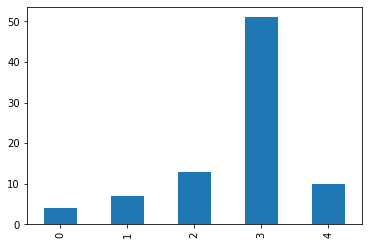

In [27]:
print(df_train_temp['label'].value_counts().sort_index())
df_train_temp['label'].value_counts().sort_index().plot(kind='bar')

0
/kaggle/working/zz/251711364.jpg


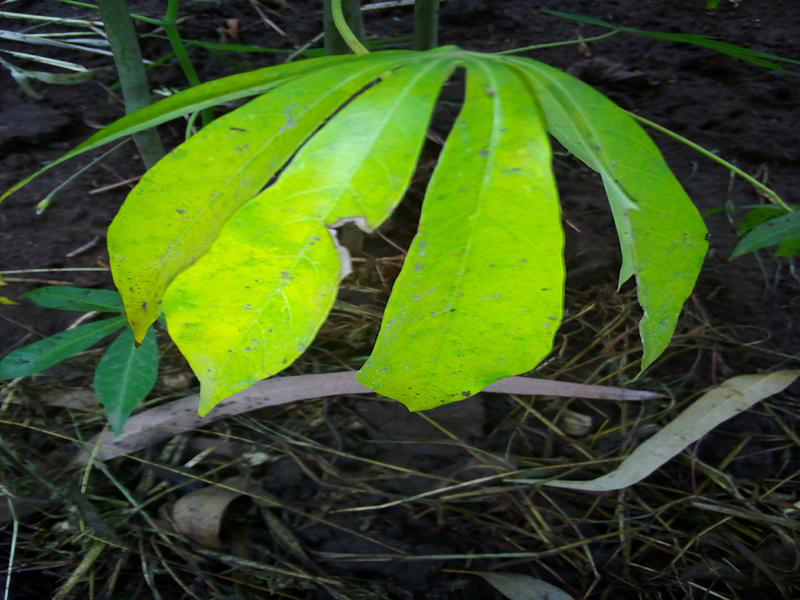

In [31]:
#view an image
image_example = '251711364.jpg'
print(lookup_label(image_example))
print(path/image_example)
Image.open(path/image_example)


1
/kaggle/working/zz/997973414.jpg


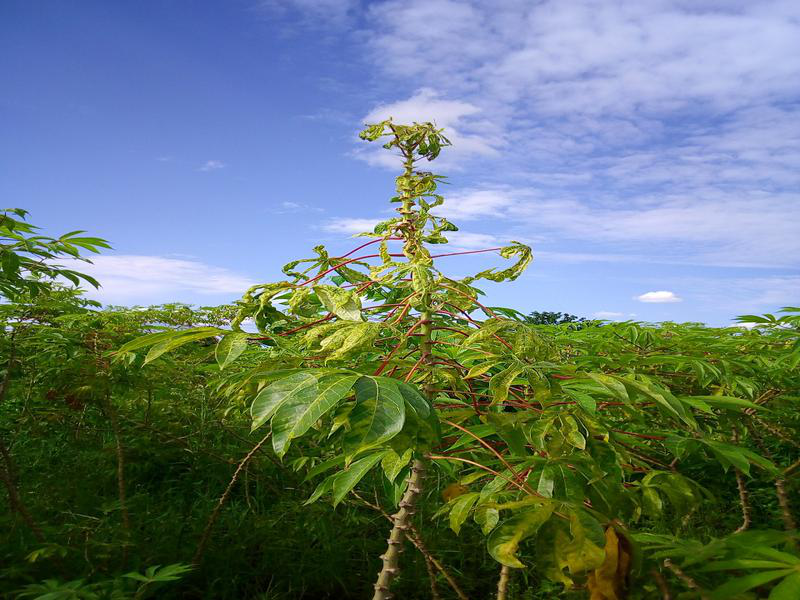

In [60]:
#view another image
image_example = '997973414.jpg'
print(lookup_label(image_example))
print(path/image_example)
Image.open(path/image_example) 
    

Path('/kaggle/working/zz')

## 1. Prep Data

### 1.1a From Data to Dataloaders
See Ch.1 Directly to DataLoaders, no DataBlock
- with no item resize

In [151]:
#my dataloaders
#dls = ImageDataLoaders.from_name_func(
#    path, get_image_files(path/'train_images'), valid_pct=0.2, seed=42,
#    label_func=lookup_label, item_tfms=Resize(224))

dls = ImageDataLoaders.from_name_func(
    path, train_img, valid_pct=0, seed=SEED, bs=16,
    label_func=lookup_label)

len(dls.train_ds), len(dls.valid_ds)

(85, 0)

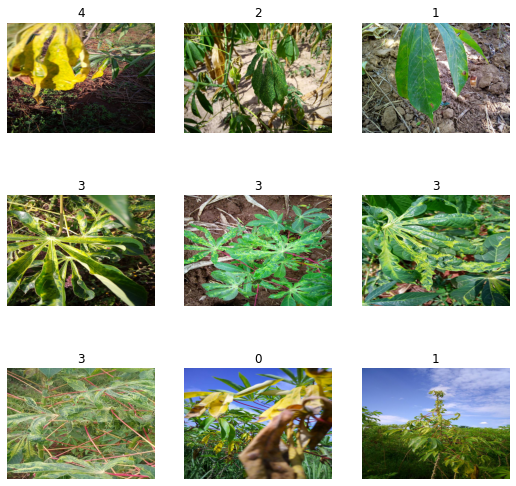

In [153]:
dls.train.show_batch()

- with item resize

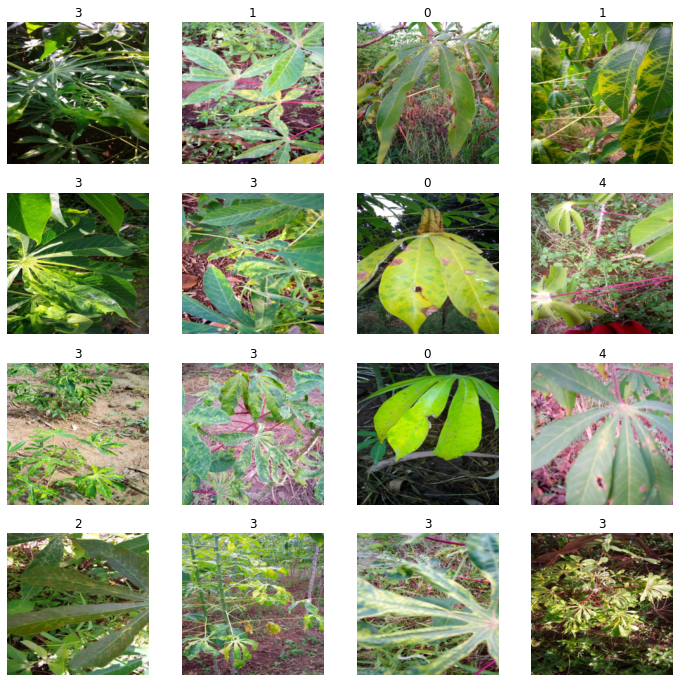

In [129]:
dls = ImageDataLoaders.from_name_func(
    path, train_img, valid_pct=0, seed=SEED, bs=16,
    label_func=lookup_label, item_tfms=Resize(224)) #

dls.train.show_batch(max_n=16, nrows=4)

### 1.1b From Data to Dataloaders
See Ch.2 with DataBlock

In [161]:
def get_x(row): return path/row['image_id']
def get_y(row): return row['label']

dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_x = get_x,
                 get_y = get_y,
                splitter=RandomSplitter(valid_pct=0.0, seed=42),
                 item_tfms = Resize(224))

In [162]:
dls = dblock.dataloaders(df_train_temp, bs=16)
len(dls.train_ds), len(dls.valid_ds)

(85, 0)

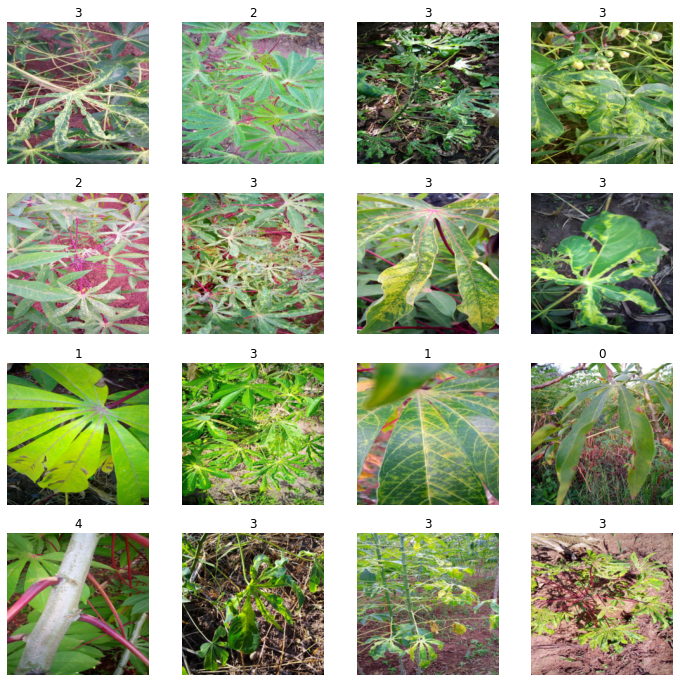

In [163]:
dls.train.show_batch(max_n=16, nrows=4)

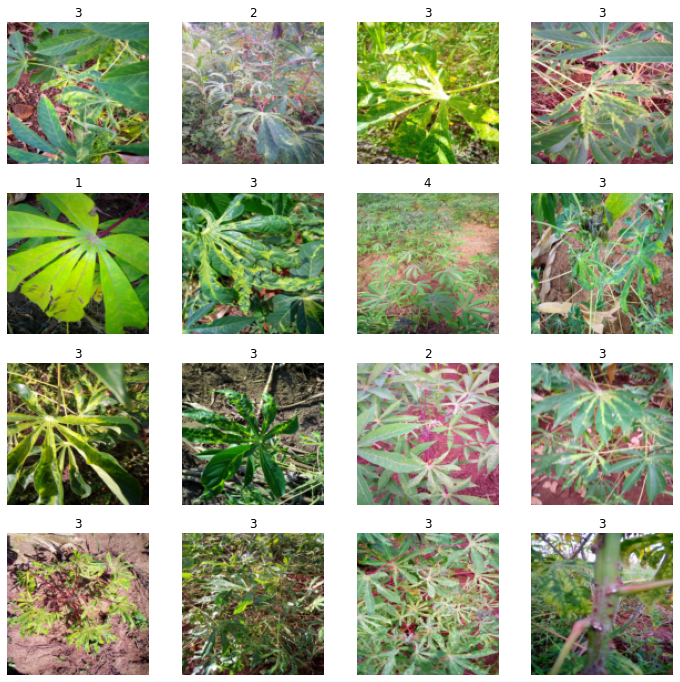

In [174]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish))
dlsSquish = dblock.dataloaders(df_train_temp, bs=16)
dlsSquish.train.show_batch(max_n=16, nrows=4)

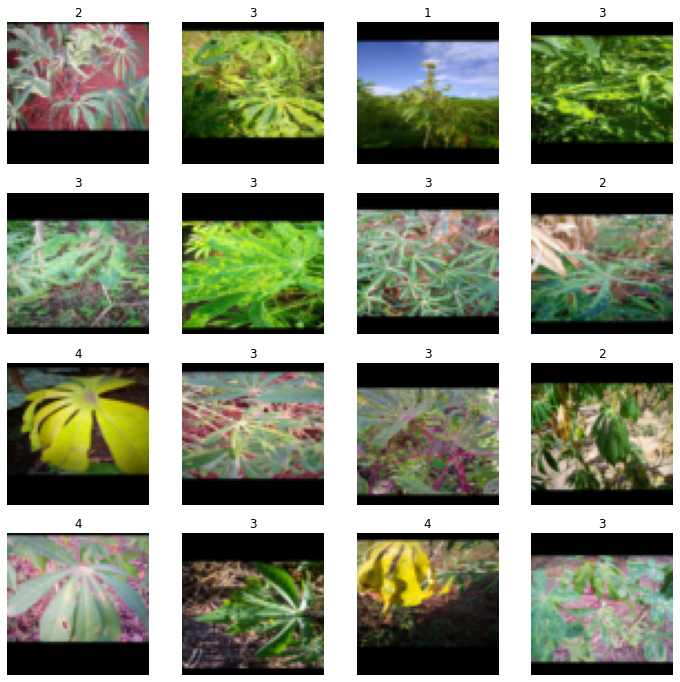

In [172]:
dblock = dblock.new(item_tfms=Resize(64, ResizeMethod.Pad, pad_mode='zeros'))
dlsPad = dblock.dataloaders(df_train_temp, bs=16)
dlsPad.train.show_batch(max_n=16, nrows=4)

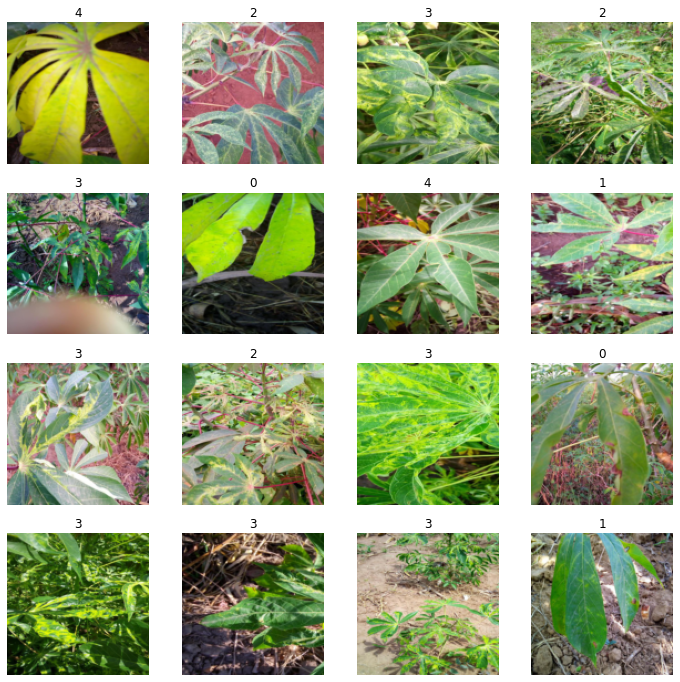

In [177]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dlsRandomCrop = dblock.dataloaders(df_train_temp, bs=16)
dlsRandomCrop.train.show_batch(max_n=16, nrows=4)

### 1.2 Data Augmentation

85 0


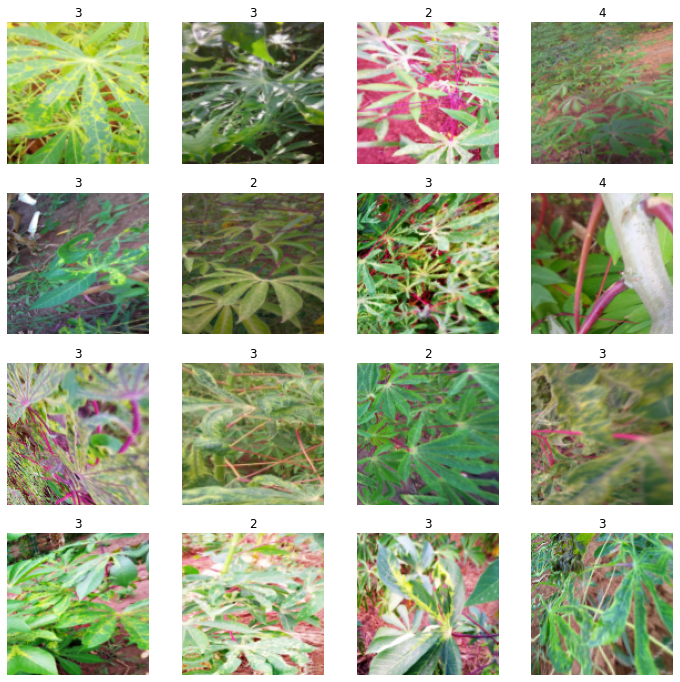

In [181]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3), batch_tfms=aug_transforms(mult=2))
dlsAug = dblock.dataloaders(df_train_temp, bs=16)
print(len(dls.train_ds), len(dls.valid_ds))
dlsAug.train.show_batch(max_n=16, nrows=4, unique=True)